In [2]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2


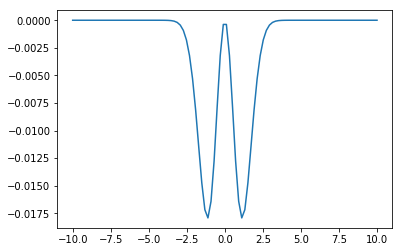

In [3]:
def mexican_hat(x, sigma=1.):
    a = 2./ ( np.sqrt(3*sigma) * np.power(np.pi,0.25 ) )
    b = (1. - (x/sigma)**2 )
    c = np.exp( - x**2/(2.*sigma**2))
    return a*b*c

def W_zero(x):
    a          = 1.0
    lambda_net = 4.0
    beta       = 3.0 / lambda_net**2
    gamma      = 1.05 * beta
    
    x_length_squared = x**2
    
    return a*np.exp(-gamma*x_length_squared) - np.exp(-beta*x_length_squared)

def createCircularMask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask





J = W_zero

x = np.linspace(-10.,10., num=100)
y = J(2*x)

plt.plot(x, y)


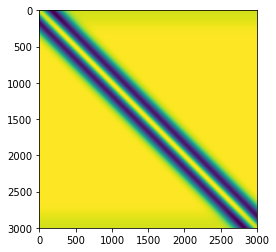

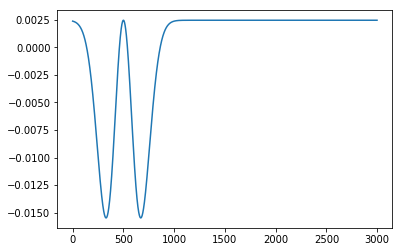

In [785]:
def normalize(x):
    x_   = x - np.amin(x)
    amax = np.amax(x_)

    if amax != 0.:
        x_ = x_/amax
    
    return x_



def create_W(J, D, s=1.0):

    W = np.zeros(D.shape)
    W = J(s*D) 

    np.fill_diagonal(W, 0.0)
    
    for i in range(n):
        W[i,:] -= np.mean(W[i,:])
    
    return W 



r = 40.
n = 3000


X = np.linspace(0.,r, num=n)


D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
            D[i,j] = np.absolute(X[i] - X[j])

        
# J = mexican_hat
J = W_zero



W = create_W(J, D, s=1.)

# W[W>0]=0.

plt.imshow(W)
plt.show()

plt.plot(W[500])
plt.show()

# tonic = - np.mean(W[:,:], axis=1)
# plt.plot(tonic)



In [786]:
def bump(mu, n, sigma=0.05):
    """
    Gaussian bump...
    """
    x = np.linspace(0,1,num=n) - mu
    a = 1./(sigma*np.sqrt(2*np.pi))
    c = sigma
    y = np.exp( - a*x**2/(2*c**2))
    return y

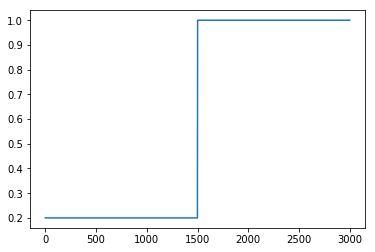

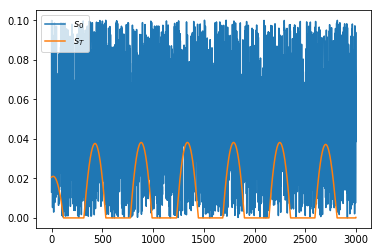

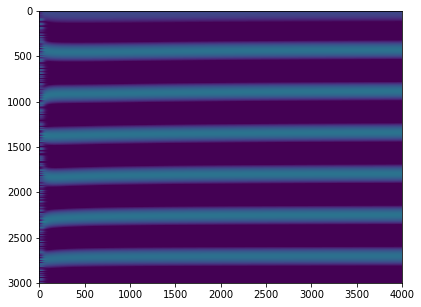

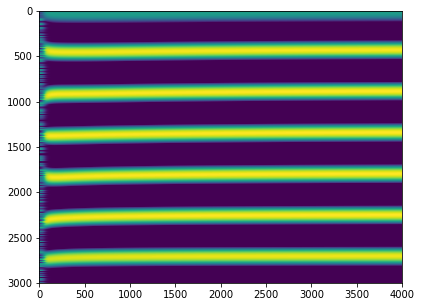

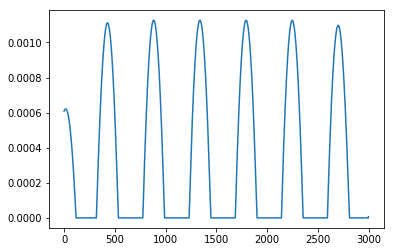

In [841]:
from htmresearch.support.gridcells.utils import cross_correlate
from scipy import ndimage
import numpy.fft as fft
from scipy.special import expit

def relu(x):
    return np.maximum(x, 0.)

# def evolve_step(W, b, s, beta=0.):
#     dt    = 0.05
#     tau   = 2.0
#     f     = relu
#     noise = np.random.randn(n)*0.0
    
#     ds    = dt*(f(np.dot(W,s+ noise) + b + beta) - s/tau)
#     s_    = s + ds
        
#     if np.sum(s_**2) >0:
#             s_ = s_/np.sqrt(np.sum(s_**2))
            
#     return s_

def evolve_step(W, b, s, beta=0.):
    dt    = 0.05
    tau   = 2.0
    f     = relu
    noise = np.random.randn(n)*0.0
    
    ds    = dt*( np.exp(-beta)*f(np.dot(W,s+ noise) + b) - s/tau)
    s_    = s + ds
        
    if np.sum(s_**2) >0:
            s_ = s_/np.sqrt(np.sum(s_**2))
            
    return s_


T = 4000
X = np.linspace(0.2,0.4,num=T)

S = np.zeros((T,n))




S[0] = np.zeros(n)
# S[0] = bump(0.1, n)*0.01
S[0] = np.random.sample(n)*0.1

Beta = np.ones((T,n))*0.0000001


rnd = np.ones(n)
rnd[n//2:] = 1.  + np.random.randn(n//2)*0.
rnd[:n//2] = 0.2 + np.random.randn(n//2)*0.
# rnd = 2*np.random.sample(n)
# Beta[0] = rnd

plt.plot(rnd)
plt.show()


for t in range(1,T):
    
    s = S[t-1]
#     x = X[t-1]
#     b = bump(x, n)*0.1
    b = np.zeros(n)
    
    tonic = 0.
#     beta  = 0.01*Beta[t-1]
    beta  = 200.*Beta[t-1]
    
    s_ = evolve_step(W, b  + tonic, s, beta)  
    S[t]    = s_

#     Beta[t] = Beta[t-1] - (s_ - np.mean(s_))
    alpha = 0.7
    ss = s_/np.sum(s_)
    Beta[t] = (1. - alpha)*Beta[t-1] + alpha*ss


plt.plot(S[0], label="$s_0$")
plt.plot(S[-1], label="$s_T$")
plt.legend()
plt.show()


plt.figure(figsize=(20,5))
plt.imshow(S.T )
plt.show()

plt.figure(figsize=(20,5))
plt.imshow(Beta.T )
plt.show()

plt.plot(Beta[-1])




0.0390521906314


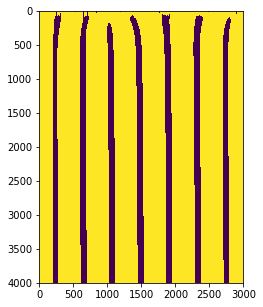

In [839]:
plt.figure(figsize=(20,5))
print np.max(Beta)
plt.imshow(Beta < 0.03 )
plt.show()

done


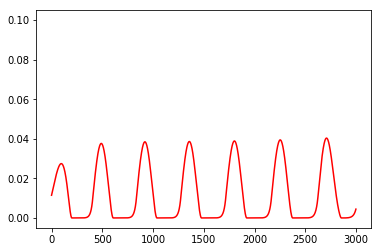

In [821]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_ydata(data[num,...])
    return line,


fig = plt.figure()

l, = plt.plot(np.arange(n), S[0], 'r-', animated=True)
ani = animation.FuncAnimation(fig, update_line, len(S), fargs=(S, l),
                                   interval=50, blit=True)

ani.save('moving_bumps.mp4')
print "done"
# plt.show()